# 1 Getting Started with Scientific Python

<div id="toc"></div>

## 1.1 Installation and Setup

## 1.2 Numpy

In [1]:
import numpy as np # recommended convention
x = np.array([1,2,3],dtype=np.float32)
x

array([ 1.,  2.,  3.], dtype=float32)

In [2]:
x.itemsize

4

In [3]:
np.sin(np.array([1,2,3],dtype=np.float32) )

array([ 0.84147096,  0.90929741,  0.14112   ], dtype=float32)

In [4]:
from math import sin
[sin(i) for i in [1,2,3]] # list comprehension

[0.8414709848078965, 0.9092974268256817, 0.1411200080598672]

In [5]:
x=np.array([ [1,2,3],[4,5,6] ])
x.shape

(2, 3)

In [6]:
x = np.array([ [1,2,3],[4,5,6] ])
x[:,0] # 0th column

array([1, 4])

In [7]:
x[:,1] # 1st column

array([2, 5])

In [8]:
x[0,:] # 0th row

array([1, 2, 3])

In [9]:
x[1,:] # 1st row

array([4, 5, 6])

In [10]:
x=np.array([ [1,2,3],[4,5,6] ])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
x[:,1:] # all rows, 1st thru last column

array([[2, 3],
       [5, 6]])

In [12]:
x[:,::2] # all rows, every other column

array([[1, 3],
       [4, 6]])

In [13]:
x[:,::-1] # reverse order of columns

array([[3, 2, 1],
       [6, 5, 4]])

### 1.2.1 Numpy Arrays and Memory

In [ ]:
%load_ext pymatbridge

In [4]:
%%matlab
x = ones(3,3)
x(:,4)=ones(3,1) % tack on extra dimension
size(x)


x =

     1     1     1
     1     1     1
     1     1     1


x =

     1     1     1     1
     1     1     1     1
     1     1     1     1


ans =

     3     4



In [6]:
import numpy as np
x = np.ones((3,3))
x

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [7]:
x[:,[0,1,2,2]] # notice duplicated last dimension
y=x[:,[0,1,2,2]] # same as above, but do assign it to y
x[0,0]=999 # change element in x
x # changed
y # not changed!
x = np.ones((3,3))
y = x[:2,:2] # view of upper left piece
x[0,0] = 999 # change value
x
y

array([[ 999.,    1.],
       [   1.,    1.]])

In [8]:
x = np.arange(5) # create array
x

array([0, 1, 2, 3, 4])

In [9]:
y=x[[0,1,2]] # index by integer list to force copy
y

array([0, 1, 2])

In [10]:
z=x[:3] # slice creates view
z # note y and z have same entries

array([0, 1, 2])

In [11]:
x[0]=999 # change element of x
x

array([999,   1,   2,   3,   4])

In [12]:
y # note y is unaffected,

array([0, 1, 2])

In [13]:
z # but z is (it’s a view).

array([999,   1,   2])

In [15]:
from numpy.lib.stride_tricks import as_strided
x = np.arange(16)
y = as_strided(x,(7,4),(8,4)) # overlapped entries
y

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13],
       [12, 13, 14, 15]])

In [16]:
x[::2]=99 # assign every other value
x

array([99,  1, 99,  3, 99,  5, 99,  7, 99,  9, 99, 11, 99, 13, 99, 15])

In [17]:
y # the changes appear because y is a view

array([[99,  1, 99,  3],
       [99,  3, 99,  5],
       [99,  5, 99,  7],
       [99,  7, 99,  9],
       [99,  9, 99, 11],
       [99, 11, 99, 13],
       [99, 13, 99, 15]])

In [19]:
n = 8 # number of elements
x = np.arange(n) # create array
k = 5 # desired number of rows
y = as_strided(x,(k,n-k+1),(x.itemsize,)*2)
y

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

### 1.2.2 Numpy Matrices

In [31]:
import numpy as np
A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
x = np.matrix([[1],[0],[0]])
A*x

matrix([[1],
        [4],
        [7]])

In [39]:
A = np.mat('1 2 3; 4 5 6; 7 8 9')
x = np.mat('1; 0; 0')
A*x

matrix([[1],
        [4],
        [7]])

In [40]:
A = np.matrix('1 2 3; 4 5 6; 7 8 9')
x = np.matrix('1; 0; 0')
A*x

matrix([[1],
        [4],
        [7]])

In [22]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
x = np.array([[1],[0],[0]])
A.dot(x)

array([[1],
       [4],
       [7]])

In [23]:
A=np.ones((3,3))
type(A) # array not matrix

numpy.ndarray

In [24]:
x=np.ones((3,1)) # array not matrix
A*x

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [41]:
np.matrix(A)*x # row-column multiplication

matrix([[1],
        [4],
        [7]])

### 1.2.3 Numpy Broadcasting

In [42]:
X,Y=np.meshgrid(np.arange(2),np.arange(2))
X

array([[0, 1],
       [0, 1]])

In [43]:
Y

array([[0, 0],
       [1, 1]])

In [44]:
X + Y

array([[0, 1],
       [1, 2]])

In [45]:
x = np.array([0,1])
y = np.array([0,1])
x

array([0, 1])

In [46]:
y

array([0, 1])

In [47]:
x + y[:,None] # add broadcast dimension

array([[0, 1],
       [1, 2]])

In [48]:
X+Y

array([[0, 1],
       [1, 2]])

In [49]:
x = np.array([0,1])
y = np.array([0,1,2])
X,Y = np.meshgrid(x,y)
X

array([[0, 1],
       [0, 1],
       [0, 1]])

In [50]:
Y

array([[0, 0],
       [1, 1],
       [2, 2]])

In [51]:
X+Y

array([[0, 1],
       [1, 2],
       [2, 3]])

In [ ]:
x+y[:,None] # same as with meshgrid

In [52]:
x = np.array([0,1])
y = np.array([0,1,2])
z = np.array([0,1,2,3])
x+y[:,None]+z[:,None,None]

array([[[0, 1],
        [1, 2],
        [2, 3]],

       [[1, 2],
        [2, 3],
        [3, 4]],

       [[2, 3],
        [3, 4],
        [4, 5]],

       [[3, 4],
        [4, 5],
        [5, 6]]])

### 1.2.4 Numpy Masked Arrays

In [54]:
from numpy import ma # import masked arrays
x = np.arange(10)
y = ma.masked_array(x, x<5)
print(y)

[-- -- -- -- -- 5 6 7 8 9]


In [56]:
print(y.shape)

(10,)


In [57]:
x[-1] = 99 # change this
print(x)
print(y) # masked array changed!

[ 0  1  2  3  4  5  6  7  8 99]
[-- -- -- -- -- 5 6 7 8 99]


### 1.2.5 Numpy Optimizations and Prospectus

## 1.3 Matplotlib

In [58]:
import matplotlib.pyplot as plt
plt.plot(range(10))

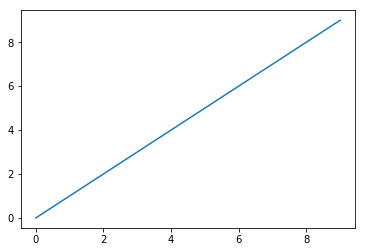

In [59]:
plt.show() # unnecessary in IPython (discussed later)

### 1.3.1 Alternatives to Matplotlib

### 1.3.2 Extensions to Matplotlib

## 1.4 IPython

### 1.4.1 IPython Notebook

## 1.5 Scipy

## 1.6 Pandas

### 1.6.1 Series

In [61]:
import pandas as pd # recommended convention
x = pd.Series(index = range(5),data=[1,3,9,11,12])
x

0     1
1     3
2     9
3    11
4    12
dtype: int64

In [64]:
x = pd.Series(index = ['a','b','d','z','z'],data=[1,3,9,11,12])
x

a     1
b     3
d     9
z    11
z    12
dtype: int64

In [65]:
x.a

1

In [66]:
x.iloc[:3]

a    1
b    3
d    9
dtype: int64

In [67]:
x.loc['a':'d']

a    1
b    3
d    9
dtype: int64

In [68]:
x['a':'d']

a    1
b    3
d    9
dtype: int64

In [70]:
x = pd.Series(range(5),[1,2,11,9,10])
x

1     0
2     1
11    2
9     3
10    4
dtype: int32

In [72]:
grp = x.groupby(lambda i:i%2) # odd or even
grp.get_group(0) # even group

2     1
10    4
dtype: int32

In [74]:
grp.get_group(1) # odd group|

1     0
11    2
9     3
dtype: int32

In [75]:
grp.max() # max in each group

0    4
1    3
dtype: int32

### 1.6.2 Dataframe

In [77]:
df = pd.DataFrame({’col1’: [1,3,11,2], ’col2’: [9,23,0,2]})

SyntaxError: invalid character in identifier (<ipython-input-77-387c9f879a5c>, line 1)

In [79]:
df = pd.DataFrame({'col1': [1,3,11,2], 'col2': [9,23,0,2]})
df

,col1,col2
0,1,9
1,3,23
2,11,0
3,2,2


In [80]:
df.iloc[:2,:2]

,col1,col2
0,1,9
1,3,23


In [81]:
df['col1']

0     1
1     3
2    11
3     2
Name: col1, dtype: int64

In [82]:
df.col1

0     1
1     3
2    11
3     2
Name: col1, dtype: int64

In [83]:
df.sum()

col1    17
col2    34
dtype: int64

In [85]:
df = pd.DataFrame({'col1': [1,1,0,0], 'col2': [1,2,3,4]})
df

,col1,col2
0,1,1
1,1,2
2,0,3
3,0,4


In [87]:
grp = df.groupby('col1')
grp.get_group(0)

,col1,col2
2,0,3
3,0,4


In [88]:
grp.get_group(1)

,col1,col2
0,1,1
1,1,2


In [89]:
grp.sum()

,col2
col1,
0,7
1,3


In [90]:
df['sum_col']=df.eval('col1 + col2')
df

,col1,col2,sum_col
0,1,1,2
1,1,2,3
2,0,3,3
3,0,4,4


In [92]:
grp = df.groupby(['sum_col','col1'])
grp

In [93]:
res = grp.sum()
res

col2
sum_col col1      
2       1        1
3       0        3
        1        2
4       0        4

In [94]:
res.unstack()

col2     
col1       0    1
sum_col          
2        NaN  1.0
3        3.0  2.0
4        4.0  NaN

## 1.7 Sympy

An important new development regarding SAGE is the freely available SAGE Cloud (https://cloud.sagemath.com/), sponsored by University of Washington that allows you to use SAGE entirely in the browser with no additional setup.  
Both SAGE and Sympy offer tight integration with the IPython Notebook for mathematical typesetting in the browser using MathJaX.  


In [98]:
import sympy as S # might take awhile
x = S.symbols('x')
x

x

In [99]:
p = sum(x**i for i in range(3)) # 2nd order polynomial
p

x**2 + x + 1

In [100]:
S.solve(p) # solves p == 0

[-1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [101]:
S.roots(p)

{-1/2 - sqrt(3)*I/2: 1, -1/2 + sqrt(3)*I/2: 1}

In [102]:
from sympy.abc import a,b,c # quick way to get common symbols
p = a* x**2 + b*x + c
S.solve(p,x) # specific solving for x-variable

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

In [103]:
S.exp(S.I*a) #using Sympy exponential

exp(I*a)

In [104]:
S.expand_complex(S.exp(S.I*a))

I*exp(-im(a))*sin(re(a)) + exp(-im(a))*cos(re(a))

In [105]:
a = S.symbols('a',real=True)
S.expand_complex(S.exp(S.I*a))

I*sin(a) + cos(a)

In [110]:
y = S.tan(x) * x + x**2
yf = S.lambdify(x,y,'numpy')
y.subs(x,.1) # evaluated using Sympy

0.0200334672085451

In [107]:
yf(.1) # evaluated using Numpy

0.020033467208545055

In [108]:
yf(np.arange(3)) # input is Numpy array

array([ 0.        ,  2.55740772, -0.37007973])

In [109]:
[ y.subs(x,i).evalf() for i in range(3) ] # need extra work for Sympy

[0, 2.55740772465490, -0.370079726523038]

## 1.8 Interfacing with Compiled Libraries

## 1.9 Integrated Development Environments

## 1.10 Quick Guide to Performance and Parallel Programming

Python has its own built-in profiler cProfile you can invoke from the command line as in the following
```py
>>> python -m cProfile -o program.prof my_program.py
```

The basic template for using multiprocessing is the following:

In [ ]:
# %load python_quick/notebooks/src-python_quick/multiprocessing_demo.py
# filename multiprocessing_demo.py
import multiprocessing
import time
def worker(k):
   'worker function'
   print 'am starting process %d' % (k)
   time.sleep(10) # wait ten seconds
   print 'am done waiting!'
   return

if __name__ == '__main__':
   for i in range(10):
       p = multiprocessing.Process(target=worker, args=(i,))
       p.start()



## 1.11 Other Resources

## References